In [1]:
# 加载IMDB数据集
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
# 第一条评论
train_data[0]

In [6]:
# 一共25000条训练评论
train_data.shape

(25000,)

In [8]:
# word_index是一个将单词映射为整数索引的字典
word_index = imdb.get_word_index()
# 将整数索引映射为单词
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 得到评论， '?' 如果值不存在返回 '?'
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print (decoded_review)

1646592/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [0]:
# 将整数序列编码为二进制矩阵
# one hot编码
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        # print (i, sequence)
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
# 标签向量化
y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

In [17]:
# 模型定义
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
# 编译模型
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# 配置优化器
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
# 使用自定义的损失和指标
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [0]:
# 留出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
# 训练模型
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 11s 737us/step - loss: 0.5001 - acc: 0.7867 - val_loss: 0.4237 - val_acc: 0.8275
Epoch 2/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.2999 - acc: 0.9047 - val_loss: 0.3273 - val_acc: 0.8682
Epoch 3/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.2235 - acc: 0.9267 - val_loss: 0.2827 - val_acc: 0.8873
Epoch 4/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1762 - acc: 0.9443 - val_loss: 0.2821 - val_acc: 0.8871
Epoch 5/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1436 - acc: 0.9538 - val_loss: 0.2815 - val_acc: 0.8880
Epoch 6/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1183 - acc: 0.9629 - val_loss: 0.2963 - val_acc: 0.8857
Epoch 7/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.0977 - acc: 0.9709 - val_loss: 0.3140

In [23]:
# History对象
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

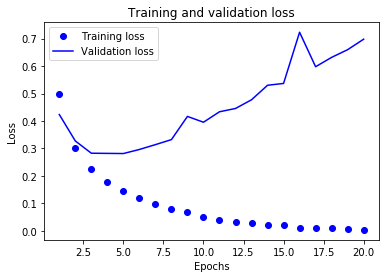

In [25]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

# bo：表示蓝色圆点
plt.plot(epochs, loss_values, 'bo', label='Training loss')
# b：表示蓝色实线
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

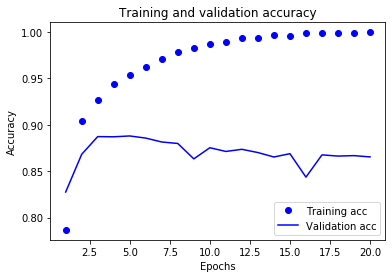

In [27]:
# 绘制训练精度和验证精度

# 清空图像
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [28]:
# 从头开始重新训练一个模型
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 65us/step - loss: 0.4803 - acc: 0.8128
Epoch 2/4
25000/25000 [==============================] - 1s 58us/step - loss: 0.2754 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 1s 58us/step - loss: 0.2097 - acc: 0.9258
Epoch 4/4
25000/25000 [==============================] - 2s 76us/step


In [29]:
results

[0.2887797559261322, 0.88536]

In [30]:
# 预测结果
model.predict(x_test)

array([[0.18095312],
       [0.99994886],
       [0.9278122 ],
       ...,
       [0.1550624 ],
       [0.06992459],
       [0.5258658 ]], dtype=float32)